# Project using keras and backend as tensorflow
- Business Statement: Identify hand written digits by using data of MNIST
- [Read more about hand written digit database MNIST](http://yann.lecun.com/exdb/mnist/)

# Step 1 of 5: Import Required Modules

In [3]:
# imports for array-handling and plotting
import os
import numpy as np
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


# Step 2 of 5: Understanding and Preparing the Dataset

In [5]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [11]:
print('X_train recod count: ', len(X_train))
print('y_train recod count: ', len(y_train))
print('X_test recod count : ', len(X_test))
print('y_test recod count : ', len(y_test))

X_train recod count:  60000
y_train recod count:  60000
X_test recod count :  10000
y_test recod count :  10000


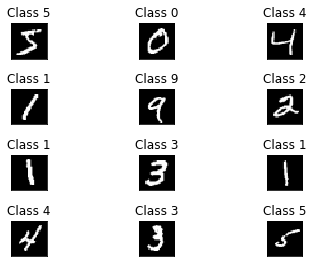

In [14]:
# Observe first 12 images of train data set
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    #plt.show()    

In [15]:
X_train.shape

(60000, 28, 28)

In order to train our neural network to classify images we first have to unroll the # height × width pixel format into one big vector - the input vector. So its length must be  28 * 28 = 784.
let's graph the distribution of our pixel values.

In [17]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [20]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [21]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
#Let us see the number of expected outcomes
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


Let's encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories. The vector is all zeroes except in the position for the respective category. Thus a '5' will be represented by [0,0,0,0,0,1,0,0,0,0]

In [24]:
#one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


1. Our pixel vector serves as the input. Then, two hidden 512-node layers, with enough model complexity for recognizing digits. For the multi-class classification we add another densely-connected (or fully-connected) layer for the 10 different output classes. For this network architecture we can use the Keras Sequential Model. We can stack layers using the .add() method.
2. When adding the first layer in the Sequential Model we need to specify the input shape so Keras can create the appropriate matrices. For all remaining layers the shape is inferred automatically.
3. In order to introduce nonlinearities into the network and elevate it beyond the capabilities of a simple perceptron we also add activation functions to the hidden layers. The differentiation for the training via backpropagation is happening behind the scenes without having to implement the details.
4. We also add dropout as a way to prevent overfitting. Here we randomly keep some network weights fixed when we would normally update them so that the network doesn't rely too much on very few nodes.
5. The last layer consists of connections for our 10 classes and the softmax activation which is standard for multi-class targets.

In [26]:
# building a linear stack of layers with the sequential model
# define input and fitst hidden layers
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

# define second hidden layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# define output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Step 4 of 5: Compiling and Training the Model

In [27]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')
#We can start the training the model
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=8,
          #verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 30s 496us/step - loss: 0.2483 - acc: 0.9252 - val_loss: 0.1179 - val_acc: 0.9632
Epoch 2/8
60000/60000 [==============================] - 25s 420us/step - loss: 0.0983 - acc: 0.9703 - val_loss: 0.0919 - val_acc: 0.9696
Epoch 3/8
60000/60000 [==============================] - 23s 384us/step - loss: 0.0730 - acc: 0.9770 - val_loss: 0.0779 - val_acc: 0.9756
Epoch 4/8
60000/60000 [==============================] - 24s 408us/step - loss: 0.0548 - acc: 0.9822 - val_loss: 0.0711 - val_acc: 0.9780
Epoch 5/8
60000/60000 [==============================] - 22s 371us/step - loss: 0.0454 - acc: 0.9852 - val_loss: 0.0649 - val_acc: 0.9804
Epoch 6/8
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0409 - acc: 0.9867 - val_loss: 0.0696 - val_acc: 0.9800
Epoch 7/8
60000/60000 [==============================] - 36s 593us/step - loss: 0.0313 - acc: 0.9897 - val_loss: 0.0750 - va

In [28]:
# saving the model
save_dir = "C:\\Users\\jaydipkumar.varu\\OneDrive - Accenture\\Data Science\\Python"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model_path

'C:\\Users\\jaydipkumar.varu\\OneDrive - Accenture\\Data Science\\Python\\keras_mnist.h5'

In [29]:
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\jaydipkumar.varu\OneDrive - Accenture\Data Science\Python\keras_mnist.h5 


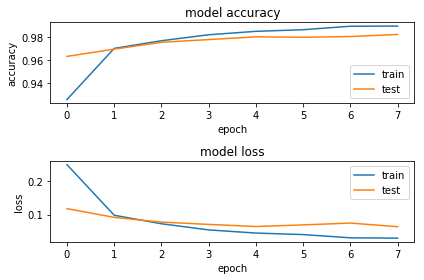

In [32]:
# plotting the metrics
#fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
#fig

# Step 5 of 5: Evaluate the Model Performance

In [33]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.0643267976840667
Test Accuracy 0.9825
